<a href="https://colab.research.google.com/github/AswinManohar/Satellite-data-analytics/blob/main/Hyperspectral_image_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hyperpectral image analysis of satellite data**

In [ ]:
!wget http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat


#Download sample data from the Remote sensing data Laboratory : https://rslab.ut.ac.ir/data 

--2021-03-27 10:03:39--  http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34806917 (33M)
Saving to: ‘PaviaU.mat’

PaviaU.mat          100%[===================>]  33.19M   736KB/s    in 47s     

2021-03-27 10:04:28 (718 KB/s) - ‘PaviaU.mat’ saved [34806917/34806917]

--2021-03-27 10:04:28--  http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11005 (11K)
Saving to: ‘PaviaU_gt.mat’

PaviaU_gt.mat       100%[===================>]  10.75K  --.-KB/s    in 0s      

2021-03-27 10:04:28 (94.4 MB/s) - ‘PaviaU_gt.mat’ saved [11005/11005]

FINISHED --2021-03-27 10:04:28--
Total wall clock time: 49s
Downloaded: 2 files, 33M in 47s (718 KB/s)


In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
#Read data and get it's shape
def read_HSI():
  X = loadmat('PaviaU.mat')['paviaU']
  y = loadmat('PaviaU_gt.mat')['paviaU_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (610, 340, 103)
y shape: (610, 340)


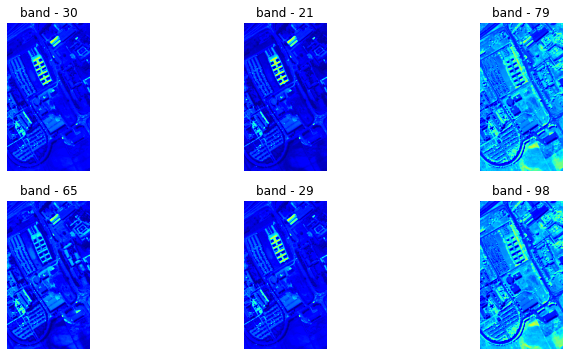

In [ ]:
sns.axes_style('whitegrid')
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='jet')
    plt.axis('off')
    plt.title(f'band - {q}')

In [ ]:
def get_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('hsi_dataset.csv')
  return df 
df = get_pixels(X, y)

In [ ]:
# Visualizing the Ground truth of the HSI

cls = px.imshow(y, color_continuous_scale='jet',)
                
cls.update_layout(title = 'Gound Trurh', coloraxis_showscale=False)
cls.update_xaxes(showticklabels=False)
cls.update_yaxes(showticklabels=False)
cls.show()
# py.plot(cls, filename = 'ground_truth', auto_open=True)

In [ ]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band64,band65,band66,band67,band68,band69,band70,band71,band72,band73,band74,band75,band76,band77,band78,band79,band80,band81,band82,band83,band84,band85,band86,band87,band88,band89,band90,band91,band92,band93,band94,band95,band96,band97,band98,band99,band100,band101,band102,band103
count,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.00000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,...,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000
mean,925.324995,850.237584,800.363558,809.889783,830.085950,834.162700,833.530641,825.932729,823.827637,830.388689,838.761900,833.532261,833.957903,840.022734,846.49027,849.024166,858.274605,869.041553,879.729687,893.426895,909.047888,929.773245,950.449826,971.719296,999.330747,1030.487247,1047.342570,1056.144036,1064.008298,1078.164397,1094.337912,1102.542194,1106.111823,1112.674807,1116.410511,1117.368182,1116.463134,1115.816958,1115.709667,1116.513134,...,1151.786355,1167.364634,1196.965762,1242.671355,1300.318158,1374.747102,1451.015511,1524.074653,1596.037252,1671.897768,1753.491707,1835.790125,1922.294619,1996.554687,2063.378761,2114.096861,2155.272912,2194.415844,2216.565135,2212.345323,2193.142758,2210.446374,2232.427758,2245.315858,2245.806716,2246.235497,2253.048669,2267.367917,2265.880313,2257.890217,2262.503269,2266.693293,2257.763443,2249.329595,2246.216779,2238.254364,2231.822647,2224.744884,2236.901707,2253.451692
std,444.427499,468.464292,493.590158,527.235307,555.419089,574.543548,592.474167,605.782075,619.492506,636.532214,654.150867,663.504620,675.055950,685.877447,694.17722,700.069128,706.904269,710.988908,712.225631,712.766144,711.116605,707.754548,702.056494,696.329369,694.323524,695.658318,691.457118,685.112863,680.143249,679.484331,680.548766,678.991678,678.109958,681.818279,686.403595,691.668118,696.466303,700.002590,701.182840,700.248079,...,736.586216,724.016756,708.647458,695.452171,674.953291,653.314752,632.543791,615.486140,603.333136,597.054264,605.347893,629.388781,667.016967,708.788296,750.020598,785.134096,814.465202,840.078731,856.606082,852.494726,820.735878,830.340437,856.128856,869.604098,871.258687,870.414926,870.642830,872.611679,868.905723,863.646853,863.285910,863.351557,857.286520,845.571285,833.001117,826.922155,827.403828,827.257369,834.092348,844.165146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,26.000000,37.000000,41.000000,59.000000,71.000000,72.0000

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,4)]+['class']

In [ ]:
q.head()

,PC-1,PC-2,PC-3,class
0,-5150.190044,6795.052770,1532.351461,0
1,-6082.245760,3158.592195,1463.194744,0
2,-7214.505405,1158.875812,1400.817899,0
3,-6566.279360,3398.894763,1126.024772,0
4,-6496.967970,2154.797771,1035.954575,0


In [ ]:
# saving to .csv
q.to_csv('paviaU_3.csv', index=False)

In [ ]:
qq = q[q['class'] != 0]
qq['class'].value_counts()

2    18649
1     6631
6     5029
8     3682
4     3064
3     2099
5     1345
7     1330
9      947
Name: class, dtype: int64

In [ ]:
class_labels = {'1': 'Asphalt'	,
'2'	:'Meadows'	,
'3'	:'Gravel'	,
'4'	:'Trees'	,
'5'	:'Painted metal sheets'	,
'6'	: 'Bare Soil'	,
'7'	:'Bitumen'	,
'8'	:'Self Blocking Bricks'	,
'9'	:'Shadows'}



In [ ]:
qq['label'] =  qq['class'].apply(lambda x : class_labels[str(x)])
qq['label'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Meadows                 18649
Asphalt                  6631
Bare Soil                5029
Self Blocking Bricks     3682
Trees                    3064
Gravel                   2099
Painted metal sheets     1345
Bitumen                  1330
Shadows                   947
Name: label, dtype: int64

In [ ]:
import plotly.express as px
count = qq['class'].value_counts()
bar_fig = px.bar(x = count.index[1:], y = count[1:], labels= class_labels, color = count.index[1:] )
bar_fig.update_layout(
    xaxis = dict(
        title='Class',
        tickmode = 'array',
        tickvals = count.index[1:].tolist(),
        
        tickangle = 45
    ),
    yaxis = dict(
        title='count',
      ),
      showlegend=False
)
bar_fig.show()

In [ ]:
# sampling dataset
sample_size = 200
sample = qq.groupby('class').apply(lambda x: x.sample(sample_size))
sample.head()

PC-1         PC-2         PC-3  class    label
class                                                              
1     183417 -2913.860473 -4881.960734    23.713137      1  Asphalt
      28022   3336.770276 -6335.309580   708.353449      1  Asphalt
      139355  7149.665066   -79.228098 -1356.670401      1  Asphalt
      20760   -285.518875 -4518.239414   301.545861      1  Asphalt
      183944 -1776.076626 -5322.900175   516.486542      1  Asphalt

In [ ]:
scatter_3d = px.scatter_3d(sample, x="PC-1", y="PC-2", z="PC-3", color="label", size="class", hover_name="label",
                  symbol="label")#, color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
scatter_3d.show()
py.plot(scatter_3d, filename = 'scatter_3d', auto_open=True)

NameError: ignored

TypeError: ignored

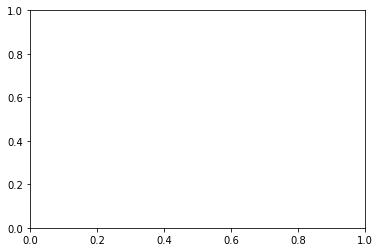

In [ ]:
area_plt1 = px.area(sample, x="PC-1", y="PC-2", color="label", line_group="label")
area_plt1.show()
plt.plot(area_plt1, filename = 'area_plt1', auto_open=True)

In [ ]:
area_plt2 = px.area(sample, x="PC-1", y="PC-3", color="label", line_group="label")
area_plt2.show()
py.plot(area_plt2, filename = 'area_plt2', auto_open=True)

NameError: ignored

In [ ]:
area_plt3 = px.area(sample, x="PC-2", y="PC-3", color="label", line_group="label")
area_plt3.show()
py.plot(area_plt3, filename = 'area_plt2', auto_open=True)

NameError: ignored

In [ ]:
pair = px.scatter_matrix(sample, dimensions=["PC-1", "PC-2", "PC-3"], color="label")
pair.show()
py.plot(pair, filename = 'pair_plot_pc', auto_open=True)

NameError: ignored

In [ ]:
fig = px.scatter(sample, x="PC-1", y="PC-2", size="class", color="label",
           hover_name="label", log_x=True, size_max=12)
fig.show()

In [ ]:
# Box Plot
fig = fig = px.violin(sample, y="PC-1", x="PC-2", color="label", box=True, points="all", hover_data=['PC-1', 'PC-2', 'PC-3','label'])
fig.show()

In [ ]:

line = px.line_3d(sample, x="PC-1", y="PC-2", z="PC-3", color="label", line_dash="label")
line.show()
py.plot(line, filename = '3D_Scatter_line_Plot', auto_open=True)

NameError: ignored